In [1]:
from matplotlib import pyplot as plt
import glob
import re

In [16]:
def plot(dirname, type="unif"):
  tests = glob.glob(f"{dirname}/{type}*.txt")
  print(tests)

  loads = []
  avg_lats = []

  for test in tests:
    test_params = test.split("-")
    load = int(float(test_params[2]))
    total_step = int(float(test_params[-1].split(".")[0]))
    print(test, load, total_step)

    with open(test, "r") as f:
      tot_lat = 0
      for row in f:
        row = row.split(" ")
        if len(row) != 3 or not row[0].startswith("Latency"):
          print("error line", row)
          continue
        tot_lat += int(row[-1])
      avg_lat = tot_lat / load
      print(avg_lat)

    loads.append(load)
    avg_lats.append(avg_lat)

  return loads, avg_lats



In [19]:
loads, avg_lats = plot("./data")
print(loads, avg_lats)

['./data\\unif-load-10000-100000.txt', './data\\unif-load-1e3-1e5.txt', './data\\unif-load-1e5-1e5.txt']
./data\unif-load-10000-100000.txt 10000 100000
6.4844
./data\unif-load-1e3-1e5.txt 1000 100000
6.655
./data\unif-load-1e5-1e5.txt 100000 100000
7.45612
[10000, 1000, 100000] [6.4844, 6.655, 7.45612]


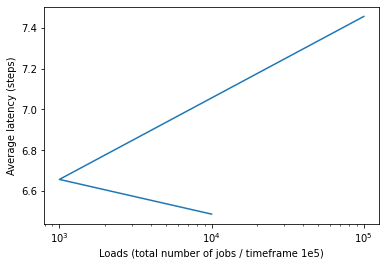

In [21]:
plt.plot(loads, avg_lats)
plt.xscale("log")
plt.xlabel("Loads (total number of jobs / timeframe 1e5)")
plt.ylabel("Average latency (steps)")
plt.show()